# Taller 1 Cálculo Numérico

# Diferenciación

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import lagrange,CubicSpline, interp1d
from scipy.integrate import trapezoid,simpson, quad

# 1.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


$$
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
$$

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

- La librearia sympy.

- Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

- Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

$$
E_z = - \frac{\partial V}{\partial z}
$$

- Utilizando sympy

In [98]:
# Definimos nuestras variables como simbolos de sympy
z = sp.symbols('z')
R = 1e-4
k = sp.symbols('k')
q = sp.symbols('q_{tot}')

# Definimos V como una funcion de sympy
V = k*q / sp.sqrt(z**2+R**2)

# Reescalamos en unidades de kqtot diviendo la expresion del campo por kqtot
V = V/(k*q)

# Calculamos Ez como la derivada simbolica de Vr
Ez = -sp.diff(V, z)


print(f'El campo electrico reescalado en unidades de kqtot esta dado por:')
Ez

El campo electrico reescalado en unidades de kqtot esta dado por:


z/(z**2 + 1.0e-8)**(3/2)

- Cálculo en z=0.1 mm

In [99]:
# Definimos V como una funcion para operar con ella

#V = lambda z: 1/np.sqrt(z**2 + R**2)
V= sp.lambdify(z,V)

# Definimos un rango de valores para poder usar np.gradient
z_values = np.linspace(1e-4, 1e-3, 100000)

# Calculamos E
E_values = -np.gradient(V(z_values), z_values)

print(f'El valor del campo en z = 0.1 mm es: E = {E_values[0]:.3}')

El valor del campo en z = 0.1 mm es: E = 3.54e+07


- Cálculo para diferentes valores de z

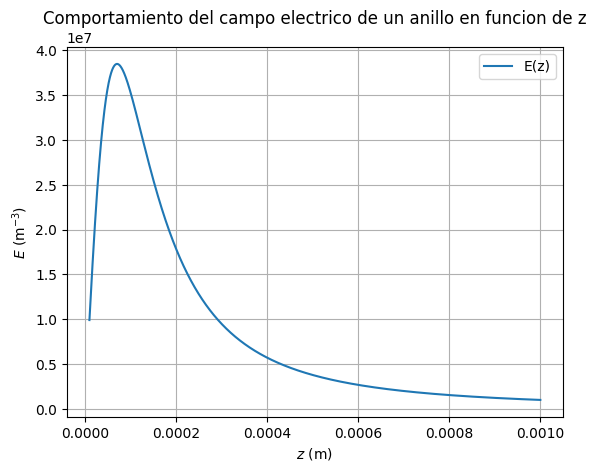

In [100]:
# Definimos un nuevo rango para z
z = np.linspace(1e-5, 1e-3,10000)

# Calculamos E para este nuevo rango
E = -np.gradient(V(z), z)

# Graficamos
plt.title('Comportamiento del campo electrico de un anillo en funcion de z')
plt.plot(z, E, label = 'E(z)')
plt.xlabel('$z$ (m)')
plt.ylabel('$E$ (m$^{-3}$)')
plt.legend()
plt.grid()
plt.show()

# 2.
Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

```
t = np.array([0, 25, 50, 75, 100, 125])  # Tiempo en s
y = np.array([0, 32, 58, 78, 92, 100])  # Distancia recorrida en km
```

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

In [101]:
# Datos proporcionados
t = np.array([0, 25, 50, 75, 100, 125])  # Tiempo en s
y = np.array([0, 32, 58, 78, 92, 100])    # Distancia en km

# Convertir distancia a metros (para trabajar en unidades SI)
y = y * 1000  # [m]

# Calcular la velocidad (dy/dt) usando np.gradient
v = np.gradient(y, t)  # Velocidad en m/s

# Calcular la aceleración (dv/dt) usando np.gradient
a = np.gradient(v, t)  # Aceleración en m/s²


# Resultados en un dataframe
df=df = pd.DataFrame({'Tiempo (s)': t, 'Distancia (m)': y,'Velocidad (m/s)': v, 'Aceleración (m/s²)':a })
df

,Tiempo (s),Distancia (m),Velocidad (m/s),Aceleración (m/s²)
0,0,0,1280.0,-4.8
1,25,32000,1160.0,-7.2
2,50,58000,920.0,-9.6
3,75,78000,680.0,-9.6
4,100,92000,440.0,-7.2
5,125,100000,320.0,-4.8


In [102]:
# Resultados en una tabla
print("Tiempo (s) | Distancia (m) | Velocidad (m/s) | Aceleración (m/s²)")
print("-" * 60)
for i in range(len(t)):
    print(f"{t[i]:9.1f} | {y[i]:13.1f} | {v[i]:15.2f} | {a[i]:15.2f}")

Tiempo (s) | Distancia (m) | Velocidad (m/s) | Aceleración (m/s²)
------------------------------------------------------------
      0.0 |           0.0 |         1280.00 |           -4.80
     25.0 |       32000.0 |         1160.00 |           -7.20
     50.0 |       58000.0 |          920.00 |           -9.60
     75.0 |       78000.0 |          680.00 |           -9.60
    100.0 |       92000.0 |          440.00 |           -7.20
    125.0 |      100000.0 |          320.00 |           -4.80


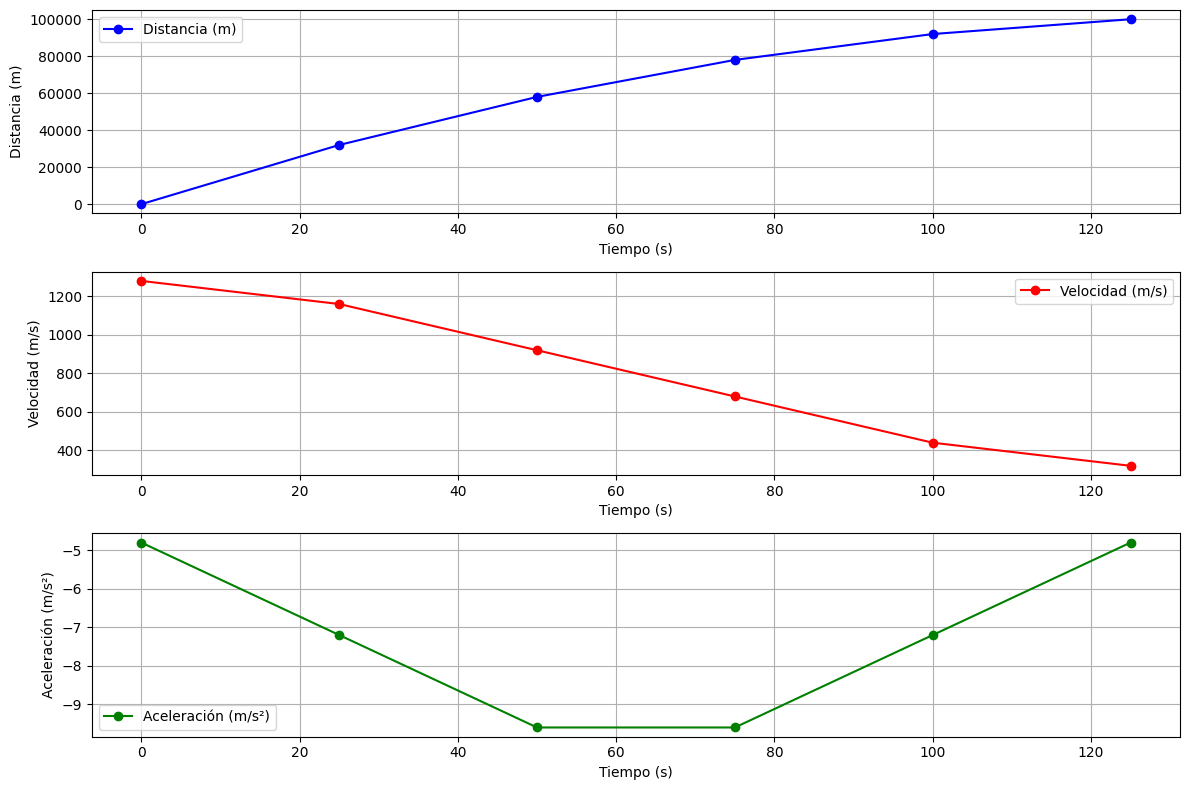

In [103]:
# Gráficas
plt.figure(figsize=(12, 8))

# Distancia vs tiempo
plt.subplot(3, 1, 1)
plt.plot(t, y, 'bo-', label='Distancia (m)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.grid()
plt.legend()

# Velocidad vs tiempo
plt.subplot(3, 1, 2)
plt.plot(t, v, 'ro-', label='Velocidad (m/s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.grid()
plt.legend()

# Aceleración vs tiempo
plt.subplot(3, 1, 3)
plt.plot(t, a, 'go-', label='Aceleración (m/s²)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (m/s²)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# 3.
Se mide la velocidad $v$ ($m/s$) del aire que fluye por una superficie plana a distintas distancias $y$ ($m$) de la superficie. Determine el esfuerzo cortante $\tau$ ($N/m^2$) en la superficie ($y = 0$) usando la ley de viscosidad de Newton:

$$
\tau = \mu \frac{dv}{dy}
$$

Suponga un valor de viscosidad dinámica $\mu = 1.8 \times 10^{-5} \, N \cdot s/m^2$.

```
y = np.array([0, 0.002, 0.006, 0.012, 0.018, 0.024])  # m
v = np.array([0, 0.287, 0.899, 1.915, 3.048, 4.299])   # m/s
```

In [104]:
# Datos proporcionados
y = np.array([0, 0.002, 0.006, 0.012, 0.018, 0.024])  # m
v = np.array([0, 0.287, 0.899, 1.915, 3.048, 4.299])  # m/s

# Viscosidad dinámica del aire
mu = 1.8e-5  # N·s/m²

# Paso 1: Calcular dv/dy en y=0 usando diferencia hacia adelante
dv_dy = np.gradient(v,y)[0]  # [m/s / m] = [1/s]

# Paso 2: Calcular el esfuerzo cortante tau
tau = mu * dv_dy  # N/m²

# Resultados
print(f"Gradiente de velocidad en y=0: dv/dy = {dv_dy:.2f} 1/s")
print(f"Esfuerzo cortante en y=0: τ = {tau:.6f} N/m²")

Gradiente de velocidad en y=0: dv/dy = 143.50 1/s
Esfuerzo cortante en y=0: τ = 0.002583 N/m²


# 4.
Se necesita medir la tasa de flujo de agua a través de un tubo pequeño. Para ello, se coloca una boquilla en la salida del tubo y se mide el volumen en función del tiempo, según los datos tabulados. Estime la tasa de flujo en $t = 7\, \text{s}$.

```
tiempo = np.array([0, 1, 5, 8])  # segundos
volumen = np.array([0, 1, 8, 16.4])  # centímetros cúbicos
```

In [105]:
# Datos proporcionados
tiempo = np.array([0, 1, 5, 8])  # segundos
volumen = np.array([0, 1, 8, 16.4])  # centímetros cúbicos

# Interpolación con Splines Cúbicos
cs = CubicSpline(tiempo, volumen)

# Derivada analítica del polinomio interpolante
Q = cs.derivative()

# Calcular el caudal en t = 7 s
Q_7 = Q(7)  # cm³/s

print(f"Tasa de flujo estimada en t = 7 s: {Q_7:.2f} cm³/s")

Tasa de flujo estimada en t = 7 s: 2.95 cm³/s


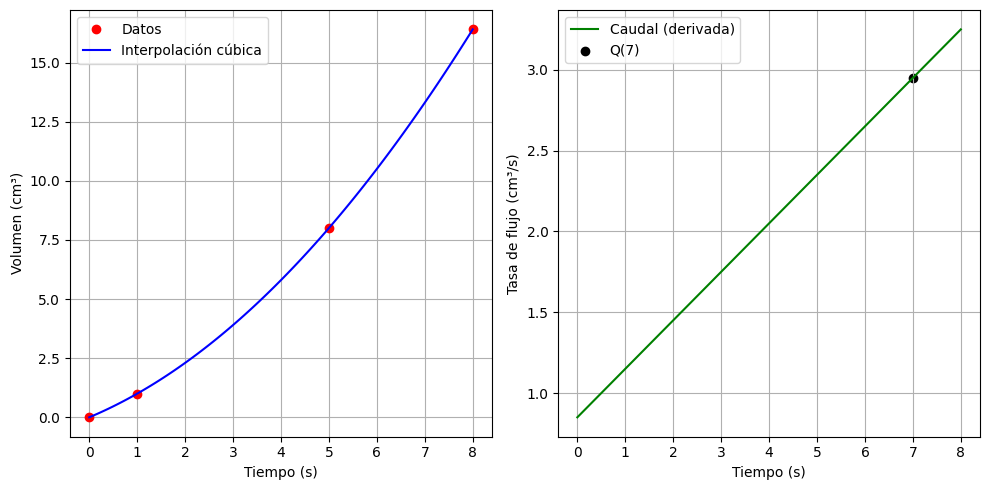

In [106]:
# Generar puntos para la gráfica
t_vals = np.linspace(0, 8, 100)
V_vals = cs(t_vals)
Q_vals = Q(t_vals)

# Graficar volumen y caudal
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(tiempo, volumen, 'ro', label='Datos')
plt.plot(t_vals, V_vals, 'b-', label='Interpolación cúbica')
plt.xlabel('Tiempo (s)')
plt.ylabel('Volumen (cm³)')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t_vals, Q_vals, 'g-', label='Caudal (derivada)')
plt.scatter([7], [Q_7], color='black', label='Q(7)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tasa de flujo (cm³/s)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 5.
Un avión es seguido por radar, y se toman datos cada segundo en coordenadas polares $\theta$ y $r$.

```
t = np.array([200, 202, 204, 206, 208, 210])  # segundos
theta = np.array([0.75, 0.72, 0.70, 0.68, 0.67, 0.66])  # radianes
r = np.array([5120, 5370, 5560, 5800, 6030, 6240])  # metros
```

A los 206 segundos, utilice diferencias finitas centradas para encontrar las expresiones vectoriales para la velocidad $\vec{v}$, y aceleración $\vec{a}$. La velocidad y aceleración en coordenadas polares son:

$$\vec{v} = \dot{r}\vec{e}_r + r\dot{\theta}\vec{e}_\theta$$

$$\vec{a} = (\ddot{r} - r\dot{\theta}^2)\vec{e}_r + (r\ddot{\theta} + 2\dot{r}\dot{\theta})\vec{e}_\theta$$

In [107]:
# Datos proporcionados
t = np.array([200, 202, 204, 206, 208, 210])  # segundos
theta = np.array([0.75, 0.72, 0.70, 0.68, 0.67, 0.66])  # radianes
r = np.array([5120, 5370, 5560, 5800, 6030, 6240])  # metros

# Diferencias finitas centradas para t = 206 s (índice 3 en los arrays)
h = t[1]-t[0]  # Diferencia de tiempo entre datos (2 segundos)
i = 3  # Índice correspondiente a t = 206 s

# Cálculo de derivadas primeras (velocidades)
dot_r = (r[i + 1] - r[i - 1]) / (2 * h)  # Derivada de r: dr/dt
dot_theta = (theta[i + 1] - theta[i - 1]) / (2 * h)  # Derivada de theta: dθ/dt

# Cálculo de derivadas segundas (aceleraciones)
ddot_r = (r[i + 1] - 2 * r[i] + r[i - 1]) / (h ** 2)  # Segunda derivada de r: d²r/dt²
ddot_theta = (theta[i + 1] - 2 * theta[i] + theta[i - 1]) / (h ** 2)  # Segunda derivada de theta: d²θ/dt²

# Expresiones vectoriales
# Velocidad en coordenadas polares
v_r = dot_r  # Componente radial de la velocidad
v_theta = r[i] * dot_theta  # Componente angular de la velocidad

# Aceleración en coordenadas polares
a_r = ddot_r - r[i] * (dot_theta ** 2)  # Componente radial de la aceleración
a_theta = r[i] * ddot_theta + 2 * dot_r * dot_theta  # Componente angular de la aceleración

# Resultados
print(f"Vector velocidad:")
print(f"  v_r = {v_r:.2f} m/s")
print(f"  v_θ = {v_theta:.2f} m/s")
print(f"  v =( {v_r:.2f} e_r + {v_theta:.2f} e_θ) m/s\n")

print(f"Vector aceleración:")
print(f"  a_r = {a_r:.2f} m/s²")
print(f"  a_θ = {a_theta:.2f} m/s²")
print(f"  a = ({a_r:.2f} e_r + {a_theta:.2f} e_θ) m/s²")


Vector velocidad:
  v_r = 117.50 m/s
  v_θ = -43.50 m/s
  v =( 117.50 e_r + -43.50 e_θ) m/s

Vector aceleración:
  a_r = -2.83 m/s²
  a_θ = 12.74 m/s²
  a = (-2.83 e_r + 12.74 e_θ) m/s²


# Integración

# 1.
La teoría de Debye para sólidos proporciona la capacidad calorífica de un sólido a temperatura $T$ como:

$$C_V = 9V \rho k_B \left( \frac{T}{\theta_D} \right)^3 \int_0^{\theta_D / T} \frac{x^4 e^x}{(e^x - 1)^2} \, dx$$


con $V$ = volumen del sólido, $p$ = densidad de número de átomos, $k_B$ = constante de Boltzmann y $\theta_D$ = temperatura de Debye (propiedad del material)


- Escriba una función en Python `cv(T)` que calcule $C_V$ para un valor dado de temperatura, para una muestra de aluminio con:
    - Volumen $V = 1000$ $cm^3$
    - Densidad $\rho = 6.022 \times 10^{28}$ $m^{-3}$
    - Temperatura de Debye $\theta_D = 428$ K
    
Use el método trapezoidal y simpson para evaluar la integral.

- Use su función para graficar la capacidad calorífica como función de temperatura desde $T = 5$ K hasta $T = 500$ K.

In [108]:
# Constantes y parámetros del material (aluminio)
V = 1000 * 1e-6  # Volumen en m³ (convertido de cm³)
rho = 6.022e28    # Densidad atómica en m⁻³
theta_D = 428     # Temperatura de Debye en K
kB = 1.380649e-23 # Constante de Boltzmann en J/K

In [109]:
# Función integrando de la teoría de Debye
def integrando(x):
    return (x**4 * np.exp(x)) / (np.exp(x) - 1)**2

## Trapezoidal

In [110]:
def trapezoidal(f, a, b, tol, max_iter=100):
    """
    Calcula la integral definida usando la regla trapezoidal adaptativa.

    Parámetros:
    f : función a integrar
    a : límite inferior
    b : límite superior
    tol : tolerancia deseada
    max_iter : máximo número de iteraciones permitidas

    Retorna:
    (float, float, int): (valor de la integral, h final, iteración final)
    """
    # Iniciamos con solo 2 puntos (h = b-a)
    h = b - a
    n = 1

    # Primera aproximación con un solo trapecio
    integral_previa = h * (f(a) + f(b)) / 2

    for i in range(max_iter):
        # Duplicamos el número de trapecios
        n *= 2
        h = (b - a) / n
        # Calculamos los nuevos puntos intermedios
        suma = 0
        for j in range(1, n):
            suma += f(a + j * h)

        # Nueva aproximación usando los puntos previos y nuevos
        integral_actual = (h/2)*(f(a)+f(b))+h*suma

        # Verificamos si alcanzamos la tolerancia deseada
        error = abs(integral_actual - integral_previa)
        if error < tol:
            return integral_actual, h, i

        integral_previa = integral_actual

    # Si llegamos aquí, no convergió en max_iter iteraciones
    raise Exception(f"No se alcanzó la tolerancia de {tol} en {max_iter} iteraciones")

In [111]:
# Función para calcular C_V usando el método trapezoidal
def cv_trapezoidal(T):
    lim_inf =1e-6
    lim_sup = theta_D / T
    integral=trapezoidal(integrando,lim_inf, lim_sup,1e-6)[0]
    return 9 * V * rho * kB * (T / theta_D)**3 * integral

## Simpson

In [112]:
def simpson_13(f, a, b, tol, max_iter=100):
    """
    Calcula la integral definida usando la regla de Simpson 1/3 adaptativa.

    Parámetros:
    f : función a integrar
    a : límite inferior
    b : límite superior
    tol : tolerancia deseada
    max_iter : máximo número de iteraciones permitidas

    Retorna:
    (float, float, int): (valor de la integral, h final, iteración final)
    """
    # Iniciamos con 2 subintervalos (3 puntos)
    n = 2  # número de subintervalos (debe ser par para Simpson 1/3)
    h = (b - a) / n

    # Primera aproximación
    integral_previa = (h / 3) * (f(a) + 4 * f(a + h) + f(b))

    for i in range(max_iter):
        # Duplicamos el número de subintervalos
        n *= 2
        h = (b - a) / n

        # Calculamos la suma de los términos nuevos
        suma_4 = 0  # puntos con coeficiente 4
        suma_2 = 0  # puntos con coeficiente 2

        # Recorremos los puntos para calcular las sumas
        for j in range(1, n):
            x = a + j * h
            if j % 2 == 0:  # puntos en posiciones pares
                suma_2 += f(x)
            else:  # puntos en posiciones impares
                suma_4 += f(x)

        # Nueva aproximación
        integral_actual = (h / 3) * (f(a) + 4 * suma_4 + 2 * suma_2 + f(b))

        # Verificamos si alcanzamos la tolerancia deseada
        error = abs(integral_actual - integral_previa)
        if error < tol:
            return integral_actual, h, i

        integral_previa = integral_actual

    # Si llegamos aquí, no convergió en max_iter iteraciones
    raise Exception(f"No se alcanzó la tolerancia de {tol} en {max_iter} iteraciones")

In [113]:
# Función para calcular C_V usando el método trapezoidal
def cv_simpson(T):
    lim_inf =1e-6
    lim_sup = theta_D / T
    integral=simpson_13(integrando,lim_inf, lim_sup,1e-6)[0]
    return 9 * V * rho * kB * (T / theta_D)**3 * integral

In [114]:
# Rango de temperaturas para graficar
T_values = np.linspace(5, 500, 100)  # Desde 5K hasta 500K

In [115]:
# Calculamos C_V para cada temperatura
Cv_trap=[cv_trapezoidal(T) for T in T_values]
Cv_simp=[cv_simpson(T) for T in T_values]

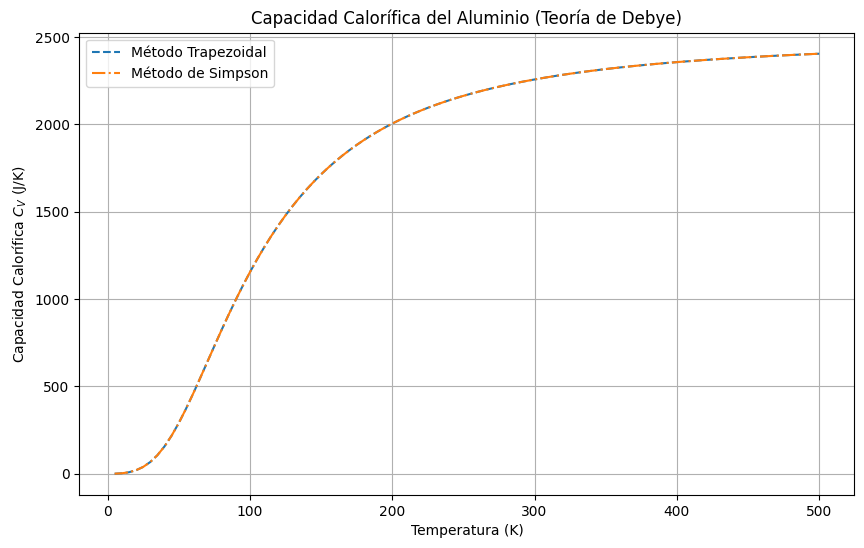

In [116]:
# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.plot(T_values, Cv_trap, label='Método Trapezoidal', linestyle='--')
plt.plot(T_values, Cv_simp, label='Método de Simpson', linestyle='-.')
plt.xlabel('Temperatura (K)')
plt.ylabel('Capacidad Calorífica $C_V$ (J/K)')
plt.title('Capacidad Calorífica del Aluminio (Teoría de Debye)')
plt.grid()
plt.legend()
plt.show()

In [117]:
# Comparamos los dos métodos en un punto específico (ej. T=300K)
T_test = 300
print(f"\nComparación en T = {T_test} K:")
print(f"Trapezoidal: {cv_trapezoidal(T_test):.4f} J/K")
print(f"Simpson:     {cv_simpson(T_test):.4f} J/K")


Comparación en T = 300 K:
Trapezoidal: 2257.7981 J/K
Simpson:     2257.7972 J/K


## Implementación con numpy y scipy

### Numpy

In [118]:
# Función para calcular C_V usando el método trapezoidal
def cv_trapezoidal_numpy(T):
    lim_inf =1e-6
    lim_sup = theta_D / T
    x = np.linspace(lim_inf, lim_sup, 1000)  # Puntos de integración
    y = integrando(x)
    integral = np.trapezoid(y, x)
    return 9 * V * rho * kB * (T / theta_D)**3 * integral

In [119]:
cv_trapezoidal_numpy(300)

np.float64(2257.79818898516)

### Scipy

In [120]:
# Función para calcular C_V usando el método trapezoidal
def cv_trapezoidal_scipy(T):
    x_max = theta_D / T
    x = np.linspace(1e-6, x_max, 1000)  # Puntos de integración
    y = integrando(x)
    integral = trapezoid(y, x)
    return 9 * V * rho * kB * (T / theta_D)**3 * integral

In [121]:
cv_trapezoidal_scipy(300)

np.float64(2257.79818898516)

In [122]:
# Función para calcular C_V usando el método de Simpson
def cv_simpson_scipy(T):
    x_max = theta_D / T
    x = np.linspace(1e-6, x_max, 1001)  # Número impar de puntos para Simpson
    y = integrando(x)
    integral = simpson(y, x)
    return 9 * V * rho * kB * (T / theta_D)**3 * integral

In [123]:
cv_simpson_scipy(300)

np.float64(2257.7973049454904)

## Reto: Implementar funciones del método trapezoidal y simpson utilizando scipy pero definiendo una tolerancia

# 2.
Se muestra la potencia $P$ suministrada a las ruedas motrices de un automóvil en función de la velocidad $v$. Para un automóvil con masa $m = 2000\,\text{kg}$, determine el tiempo $\Delta t$ que tarda en acelerar de $1\,\text{m/s}$ a $6\,\text{m/s}$.
```
v = np.array([0, 1.0, 1.8, 2.4, 3.5, 4.4, 5.1, 6.0]) # Datos de velocidad (m/s)
P = np.array([0, 4.7, 12.2, 19.0, 31.8, 40.1, 43.8, 43.2]) # Datos de potencia (kW) 
```
El tiempo de aceleración se calcula mediante:

$$\Delta t = m \int_{v_1}^{v_2} \frac{v}{P} \, dv$$




In [124]:
# Datos proporcionados
v = np.array([0, 1.0, 1.8, 2.4, 3.5, 4.4, 5.1, 6.0])  # m/s
P = np.array([0, 4.7, 12.2, 19.0, 31.8, 40.1, 43.8, 43.2])  # kW

# Convertir P de kW a W
P_W = P * 1000  # ahora en W


# Filtrar los datos dentro del rango v1=1 a v2=6
v_filtrado=v[1:]
P_filtrado=P_W[1:]
# filt = (v >= 1.0) & (v <= 6.0)
# v_filtrado = v[filt]
# P_filtrado = P_W[filt]


# Calcular el integrando v/P
integrando = v_filtrado / P_filtrado

# Calcular la integral usando la regla del trapecio
integral = np.trapezoid(integrando, v_filtrado)

# Masa del automóvil
m = 2000  # kg

# Calcular el tiempo Delta t
delta_t = m * integral

print(f"El tiempo de aceleración es: {delta_t:.2f} segundos")


El tiempo de aceleración es: 1.30 segundos


# 3.
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas $(r,\theta, \varphi)$. Resuelve para la componente $\varphi$ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

$$
A_{\varphi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
$$

donde

$$
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
$$

$$
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
$$

$$
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
$$

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $\mu_0∕4π$ = 1, calcular y graficar:

- $A_{\varphi}(r = 1.1, \theta)$ vs $\theta$

- $A_{\varphi}(r, \theta = \pi∕3)$ vs $r$


In [125]:
# Definimos k
def k(r, theta, a):
  k = np.sqrt( (4*a*r*np.sin(theta)) / (a**2 + r**2 + 2*a*r*np.sin(theta)) )

  return k

# Definimos la funcion a integral dentro de E
fe = lambda phi, r, theta, a: np.sqrt(1 - (k(r, theta, a))**2*(np.sin(phi))**2)

# Definimos E
def E(fe, r, theta, a):
  I = trapezoidal(lambda phi: fe(phi,r,theta,a), 0, np.pi/2, 1e-5)
  return I[0]

# Definimos la funcion a integral dentro de K
fk = lambda phi, r, theta, a: 1/np.sqrt(1 - (k(r, theta, a))**2*(np.sin(phi))**2)

# Definimos K
def K(fk, r, theta, a):
  I = trapezoidal(lambda phi: fk(phi,r,theta,a), 0, np.pi/2, 1e-5)

  return I[0]

# Definimos el potencial A
def A(r, theta, a, I, mu, fe, fk):
  k1 = k(r, theta, a)
  K1 = K(fk, r, theta, a)
  E1 = E(fe, r, theta, a)

  A = mu/(4*np.pi) * ( 4*I*a / (np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta))) ) * ( ((2 - k1**2)*K1 - 2*E1) / (k1**2) )

  return A

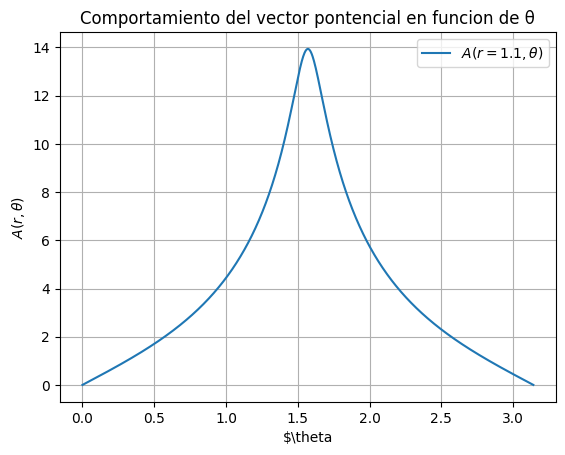

In [126]:
# Variables definidas
a = 1
I = 3
mu = 4*np.pi
r = 1.1

theta = np.linspace(1e-11, np.pi, 1000) # Variamos theta
A_a = np.zeros(1000) # Arreglo para calcular A al variar theta

# Calculamos A para todos los theta
for i in range(len(theta)):
  A_a[i]= A(r, theta[i], a, I, mu, fe, fk)

# Graficamos el comportamiento de A
plt.title('Comportamiento del vector pontencial en funcion de θ')
plt.plot(theta, A_a, label = r'$A(r=1.1,\theta)$')
plt.xlabel(r'$\theta')
plt.ylabel(r'$A(r,\theta)$')
plt.legend()
plt.grid()

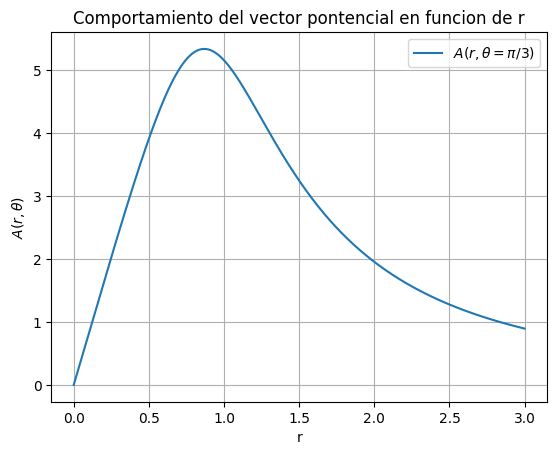

In [127]:
# Variables definidas
a = 1
I = 3
mu = 4*np.pi
theta = np.pi/3

r = np.linspace(1e-11, 3, 1000) # Variamos r
A_b = np.zeros(1000) # Arreglo para calcular A al variar r

# Calculamos A para todos los valores de r
for i in range(len(r)):
  A_b[i] = A(r[i], theta, a, I, mu, fe, fk)


# Graficamos el comportamiento de A
plt.title('Comportamiento del vector pontencial en funcion de r')
plt.plot(r, A_b, label = r'$A(r,\theta=\pi/3)$')
plt.xlabel('r')
plt.ylabel(r'$A(r,\theta)$')
plt.legend()
plt.grid()